VIII: Auswertung
===

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2

def fehler(G, sig_G, G_lit, sig_G_lit):
    print('Relativer Fehler: ', sig_G / G * 100)
    print('Rel. Fehler (Vergleich):', sig_G_lit / G_lit * 100)
    print('Absoluter Fehler: ', np.abs(G - G_lit))
    print('Sigma-Abweichung: ', np.abs(G - G_lit) / sqrt(sig_G ** 2 
                                                         + sig_G_lit ** 2))

1: Betrieb als Kältemaschine
---

In [2]:
## Teilaufgabe 1: Heizwendel ##
UH_1 = 5.69 # V
sig_UH_1 = 0.01
IH_1 = 5 * 1.11 # A
sig_IH_1 = 5 * 0.01 
c_W = 4180 # J kg^-1 K^-1
rho_W = 997 # kg m^-3
Delta_T_1 = 3.5 # K
sig_Delta_T_1 = 0.2 # K

f_list = np.array([324.8, 326.5, 325.9]) / 60 # min^-1
f = np.mean(f_list)
sig_f = 1 / sqrt(3) * np.std(f_list)

Vdot_list = np.array([232.1, 228.9, 228.5])
Vdot = np.mean(Vdot_list)
sig_Vdot = 1 / sqrt(3) * np.std(Vdot_list)

# Teilaufgabe 2: Motor
UM = 24.1 # V
sig_UM = 0.1
IM = 2 # A
sig_IM = 0.01
T_zu_2 = 19 # ºC
T_ab_2 = 21.5
Delta_T_2 = T_ab_2 - T_zu_2 # K
sig_Delta_T_2 = 0.2 

f_list_2 = np.array([320.9, 320.4, 311.6]) / 60
f_2 = np.mean(f_list_2)
sig_f_2 = 1 / sqrt(3) * np.std(f_list_2)

Vdot_list_2 = np.array([225.4, 229.2, 228.9])
Vdot_2 = np.mean(Vdot_list_2)
sig_Vdot_2 = 1 / sqrt(3) * np.std(Vdot_list_2)

In [3]:
# Berechnungen: 
PH_1 = UH_1 * IH_1 # V A = W
sig_PH_1 = sqrt( (UH_1 * sig_IH_1) ** 2 + (sig_UH_1 * IH_1) ** 2)

print('Kälteleistung P_H_1 = ', np.round(PH_1,3), '+/-', 
      np.round(sig_PH_1,3), '[W]')

Q_2 = PH_1 / f # W / min^-1 = J
sig_Q_2 = sqrt( (sig_PH_1 / f) ** 2 + (PH_1 * sig_f / f ** 2) ** 2)

print('Wärmemenge Q_2 =', np.round(Q_2, 2), '+/-', np.round(sig_Q_2, 2), '[J]')

Q_1 = 1/60 * 1e-6 * c_W * rho_W * Delta_T_1 * Vdot / f # J
rho_Q_1 = sqrt( (sig_Delta_T_1 / Delta_T_1) ** 2 + (sig_Vdot / Vdot) ** 2 
               + (sig_f / f) ** 2 )
sig_Q_1 = Q_1 * rho_Q_1
print('Wärmemenge Q_1 =', np.round(Q_1, 1), '+/-', np.round(sig_Q_1, 1), '[J]')

W_M = IM * UM / f_2 # W * min = J * 60
rho_W_M = sqrt( (sig_IM / IM) ** 2 + (sig_UM / UM) ** 2 + (sig_f_2 / f_2) ** 2 )
sig_W_M = W_M * rho_W_M
print('Mechanische Arbeit W_M =', np.round(W_M, 2), '+/-', 
      np.round(sig_W_M, 2), '[J]')

print('\nWärmeverlust Delta Q =', np.round(Q_2 + W_M - Q_1,1), '+/-', 
      np.round(sqrt(sig_Q_2 ** 2 + sig_Q_1 ** 2 + sig_W_M ** 1)))

Kälteleistung P_H_1 =  31.58 +/- 0.29 [W]
Wärmemenge Q_2 = 5.82 +/- 0.05 [J]
Wärmemenge Q_1 = 10.3 +/- 0.6 [J]
Mechanische Arbeit W_M = 9.1 +/- 0.09 [J]

Wärmeverlust Delta Q = 4.6 +/- 1.0


In [4]:
# Wirkungsgrad und Energiebilanz
eta = Q_2 / W_M
sig_eta = sqrt( (sig_Q_2 / W_M) ** 2 + (Q_2 * sig_W_M / W_M ** 2) ** 2 )
print('Wirkungsgrad eta =', np.round(100 * eta,1), '+/-', np.round(100 * sig_eta,1))
print('\nEnergiebilanz:')
fehler(Q_1, sig_Q_1, Q_2 + W_M, sqrt(sig_Q_2 ** 2 + sig_W_M ** 2))


Wirkungsgrad eta = 63.9 +/- 0.9

Energiebilanz:
Relativer Fehler:  5.729957947893736
Rel. Fehler (Vergleich): 0.715520945367871
Absoluter Fehler:  4.629998685100039
Sigma-Abweichung:  7.725655433281795


2: Betrieb als Kältemaschine und Wärmepumpe
--

In [5]:
V = 4 # ml
sig_V = 1
lambda_H20 = 335 * 1e3 # J kg^-1
t = 180 # s
sig_t = 10

# Berechnung:
PK_2 = 1e-6 * lambda_H20 * rho_W * V / t # W
sig_PK_2 = 1e-6 * lambda_H20 * rho_W * sqrt( (sig_V / t) ** 2 
                                            + (V * sig_t / t ** 2) ** 2 )
print('Kälteleistung P_K =', np.round(PK_2, 1), '+/-', 
      np.round(sig_PK_2, 1), '[W]\n')

# Vergleich zwischen PH_1 und PK_2
fehler(PH_1, sig_PH_1, PK_2, sig_PK_2)

Kälteleistung P_K = 7.4 +/- 1.9 [W]

Relativer Fehler:  0.9178831160285306
Rel. Fehler (Vergleich): 25.609845714702466
Absoluter Fehler:  24.157388888888896
Sigma-Abweichung:  12.56387590827737


3: Wärmekraftmaschine
---

In [6]:
# Teil 3
UH_3 = 11.63 # V 
sig_UH_3 = 0.1 
IH_3 = 5 * 2.52 # A
sig_IH_3 = 5 * 0.1
T_zu = 18.4 # C
T_ab = 20.6
Delta_T_3 = T_ab - T_zu # K
sig_Delta_T_3 = 0.2 

f_list_3 = np.array([285.3, 290.0, 287.6]) / 60
f_3 = np.mean(f_list_3)
sig_f_3 = 1 / sqrt(3) * np.std(f_list_3)

Vdot_list_3 = np.array([225.0, 222.9, 225.6])
Vdot_3 = np.mean(Vdot_list_3)
sig_Vdot_3 = 1 / sqrt(3) * np.std(Vdot_list_3)

W_pV_list = 1e-4 * np.array([17230, 17060, 17050]) # 10^-4 hPa cm^3 = J
W_pV = np.mean(W_pV_list)
sig_W_pV = 1 / sqrt(3) * np.std(W_pV_list)


In [7]:
# Berechnungen:
P_el = UH_3 * IH_3 # W
sig_P_el = sqrt( (sig_UH_3 * IH_3) ** 2 + (UH_3 * sig_IH_3) ** 2 ) # W
Q_el = P_el / f_3 # J
sig_Q_el = sqrt( (sig_P_el / f_3) ** 2 + (P_el * sig_f_3 / f_3 ** 2) ** 2 )

P_ab = 1/60 * 1e-6 * c_W * rho_W * Delta_T_3 * Vdot_3 # W
sig_P_ab = 1/60 * 1e-6 * c_W * rho_W * sqrt( (sig_Delta_T_3 * Vdot_3) ** 2 
                                            + (Delta_T_3 * sig_Vdot_3) ** 2 )
Q_ab = P_ab / f_3 # J
sig_Q_ab = sqrt( (sig_P_ab / f_3) ** 2 + (P_ab * sig_f_3 / f_3 ** 2) ** 2 )

P_pV = W_pV * f_3 # W
sig_P_pV = sqrt( (sig_W_pV * f_3) ** 2 + (W_pV * sig_f_3) ** 2)

eta_th = W_pV / Q_el # %
sig_eta_th = sqrt((sig_W_pV / Q_el) ** 2 + (W_pV * sig_Q_el / Q_el ** 2 ) ** 2)

print('P_el =', np.round(P_el, 0), '+/-', np.round(sig_P_el, 0), '[W]')
print('Q_el =', np.round(Q_el, 1), '+/-', np.round(sig_Q_el, 1), '[J]')
print('\nP_ab =', np.round(P_ab, 0), '+/-', np.round(sig_P_ab, 0), '[W]')
print('Q_ab =', np.round(Q_ab, 1), '+/-', np.round(sig_Q_ab, 1), '[J]')
print('\nP_pV =', np.round(P_pV, 2), '+/-', np.round(sig_P_pV, 2), '[W]')
print('W_pV =', np.round(W_pV, 3), '+/-', np.round(sig_W_pV, 3), '[J]')
print('\neta_th =', np.round(100 * eta_th, 1), '+/-', 
      np.round(100 * sig_eta_th, 1), '[%]')

P_el = 147.0 +/- 6.0 [W]
Q_el = 30.6 +/- 1.2 [J]

P_ab = 34.0 +/- 3.0 [W]
Q_ab = 7.2 +/- 0.7 [J]

P_pV = 8.2 +/- 0.04 [W]
W_pV = 1.711 +/- 0.005 [J]

eta_th = 5.6 +/- 0.2 [%]


In [8]:
# Energiebilanz:
Q_V = Q_el - W_pV - Q_ab
sig_Q_V = sqrt(sig_Q_el ** 2 + sig_W_pV ** 2 + sig_Q_ab ** 2)

print('Energieverluste:')
print('Q_V =', np.round(Q_V, 1), '+/-', np.round(sig_Q_V, 1), '[J]')

Energieverluste:
Q_V = 21.7 +/- 1.4 [J]


In [9]:
# Drehmomentmessung:
l = 0.25 # m
F = np.array([0.8, 0.6, 0.4, 0.2])
sig_F = 0.05 * np.ones(4)

UH_3b = np.array([11.64, 11.64, 11.60, 11.62]) # V
sig_UH_3b = 0.1 * np.ones(4)
IH_3b = 5 * np.array([2.53, 2.53, 2.52, 2.52]) # A
sig_IH_3b = 0.5 * np.ones(4)

f_3b_list = np.array([[234.9, 235.7, 232.3], [260.1, 258.2, 256], 
                      [296.1, 282.5, 278.9], [319.1, 310.2, 308.0]])/ 60 # s^-1
f_3b = np.array([np.mean(f_3b_list[i]) for i in range(4)])
sig_f_3b = 1/sqrt(3) * np.array([np.std(f_3b_list[i]) for i in range(4)])

W_pV_D_list = 1e-4 * np.array([[72690, 73200, 73420], [68650, 70040, 70090], 
                   [21820, 22010, 21880], [20220, 20150, 20340]]) # J
W_pV_D = np.array([np.mean(W_pV_D_list[i]) for i in range(4)])
sig_W_pV_D = 1 / sqrt(3) * np.array([np.std(W_pV_D_list[i]) for i in range(4)])
print(np.round(f_3b,3))
print(np.round(sig_f_3b,3))

[3.905 4.302 4.764 5.207]
[0.014 0.016 0.071 0.046]


In [10]:
# Berechnungen:
W_D = 2 * pi * l * F
sig_W_D = 2 * pi * l * sig_F

eta_th_D = W_pV_D / Q_el
sig_eta_th_D = sqrt( (sig_W_pV_D / Q_el) ** 2 + (W_pV_D * sig_Q_el / Q_el ** 2) ** 2)

eta_eff = W_D / Q_el
sig_eta_eff = sqrt( (sig_W_D / Q_el) ** 2 + (W_D * sig_Q_el / Q_el ** 2) ** 2 )


print('W_pV_D = ', np.round(W_pV_D, 3))
print('      +/-', np.round(sig_W_pV_D, 3), '[J]')
print('\nW_D = ', np.round(W_D, 2))
print('   +/-', np.round(sig_W_D, 2), '[J]' )
print('\neta_th_D = ', np.round(100 * eta_th_D, 1))
print('        +/-', np.round(100 *sig_eta_th_D, 1))
print('\neta_eff = ', np.round(100 *eta_eff, 1))
print('       +/-', np.round(100 *sig_eta_eff, 1))

W_pV_D =  [7.31  6.959 2.19  2.024]
      +/- [0.018 0.039 0.005 0.005] [J]

W_D =  [1.26 0.94 0.63 0.31]
   +/- [0.08 0.08 0.08 0.08] [J]

eta_th_D =  [23.9 22.8  7.2  6.6]
        +/- [1.  0.9 0.3 0.3]

eta_eff =  [4.1 3.1 2.1 1. ]
       +/- [0.3 0.3 0.3 0.3]


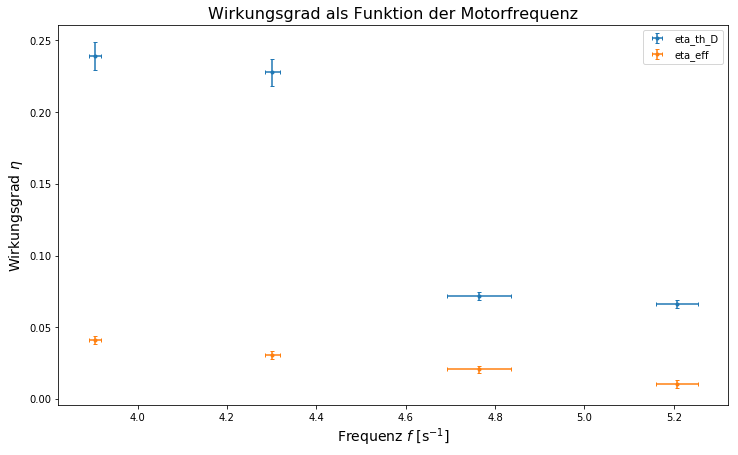

In [11]:
# Graphische Darstellung
plt.figure(figsize = (12, 7))
plt.errorbar(f_3b, eta_th_D, fmt = '.', yerr = sig_eta_th_D, xerr = sig_f_3b, 
             capsize = 2, label = 'eta_th_D')
plt.errorbar(f_3b, eta_eff, fmt = '.', yerr = sig_eta_eff, xerr = sig_f_3b,
            capsize = 2, label = 'eta_eff')
plt.title('Wirkungsgrad als Funktion der Motorfrequenz', size = 16)
plt.ylabel('Wirkungsgrad $\\eta$', size = 14)
plt.xlabel('Frequenz $f$ [s$^{-1}$]', size = 14)

plt.legend(loc = 'best')
plt.savefig('images/222/V222Diagramm1.png')
plt.show()

Sigmas
--

In [12]:
# Kälteleistung
fehler(PH_1, sig_PH_1, PK_2, sig_PK_2)

Relativer Fehler:  0.9178831160285306
Rel. Fehler (Vergleich): 25.609845714702466
Absoluter Fehler:  24.157388888888896
Sigma-Abweichung:  12.56387590827737
